Loaded 414 shapefiles with 1192112 features.
Shapefile load time: 20.49 seconds
Shapefile total size: 373.91 MB

Loaded 414 GeoParquet files with 1192112 features.
GeoParquet load time: 6.16 seconds
GeoParquet total size: 152.81 MB

Loaded 414 GeoJSON files with 1192099 features.
GeoJSON load time: 52.68 seconds
GeoJSON total size: 545.47 MB


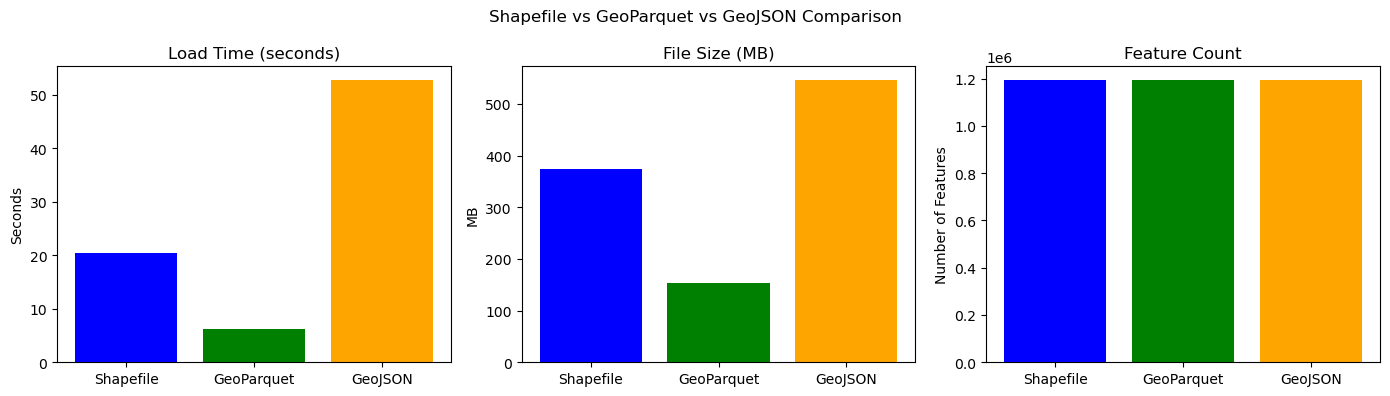

In [6]:
import geopandas as gpd
import pandas as pd
import os
import time
import matplotlib.pyplot as plt

# Paths
shapefile_path = r"C:\GIS_Dev\Data\RRC_Data\Shapefiles"
geoparquet_path = r"C:\GIS_Dev\Data\RRC_Data\GeoParquet"
geojson_path = r"C:\GIS_Dev\Data\RRC_Data\GeoJSON"

# --- Load ALL Shapefiles ---
start_shp = time.time()
shapefiles = [os.path.join(shapefile_path, f) for f in os.listdir(shapefile_path) if f.endswith('.shp')]
gdfs_shp = [gpd.read_file(shp) for shp in shapefiles]
combined_gdf_shp = gpd.GeoDataFrame(pd.concat(gdfs_shp, ignore_index=True))
end_shp = time.time()
shp_load_time = end_shp - start_shp
shp_size = sum(os.path.getsize(os.path.join(shapefile_path, f)) for f in os.listdir(shapefile_path))
shp_features = len(combined_gdf_shp)

print(f"Loaded {len(shapefiles)} shapefiles with {shp_features} features.")
print(f"Shapefile load time: {shp_load_time:.2f} seconds")
print(f"Shapefile total size: {shp_size / (1024**2):.2f} MB\n")

# --- Load ALL GeoParquet files ---
start_parquet = time.time()
parquet_files = [os.path.join(geoparquet_path, f) for f in os.listdir(geoparquet_path) if f.endswith('.parquet')]
gdfs_parquet = [gpd.read_parquet(pq) for pq in parquet_files]
combined_gdf_parquet = gpd.GeoDataFrame(pd.concat(gdfs_parquet, ignore_index=True))
end_parquet = time.time()
parquet_load_time = end_parquet - start_parquet
pq_size = sum(os.path.getsize(os.path.join(geoparquet_path, f)) for f in os.listdir(geoparquet_path))
pq_features = len(combined_gdf_parquet)

print(f"Loaded {len(parquet_files)} GeoParquet files with {pq_features} features.")
print(f"GeoParquet load time: {parquet_load_time:.2f} seconds")
print(f"GeoParquet total size: {pq_size / (1024**2):.2f} MB\n")

# --- Load ALL GeoJSON files ---
start_geojson = time.time()
geojson_files = [os.path.join(geojson_path, f) for f in os.listdir(geojson_path) if f.endswith('.geojson')]
gdfs_geojson = [gpd.read_file(gj) for gj in geojson_files]
combined_gdf_geojson = gpd.GeoDataFrame(pd.concat(gdfs_geojson, ignore_index=True))
end_geojson = time.time()
geojson_load_time = end_geojson - start_geojson
geojson_size = sum(os.path.getsize(os.path.join(geojson_path, f)) for f in os.listdir(geojson_path))
geojson_features = len(combined_gdf_geojson)

print(f"Loaded {len(geojson_files)} GeoJSON files with {geojson_features} features.")
print(f"GeoJSON load time: {geojson_load_time:.2f} seconds")
print(f"GeoJSON total size: {geojson_size / (1024**2):.2f} MB")

# --- Bar Chart Comparison (Load Time, Size, Feature Count) ---
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

formats = ['Shapefile', 'GeoParquet', 'GeoJSON']
load_times = [shp_load_time, parquet_load_time, geojson_load_time]
sizes_mb = [shp_size / (1024**2), pq_size / (1024**2), geojson_size / (1024**2)]
feature_counts = [shp_features, pq_features, geojson_features]

# Load Time Bar Chart
axes[0].bar(formats, load_times, color=['blue', 'green', 'orange'])
axes[0].set_title('Load Time (seconds)')
axes[0].set_ylabel('Seconds')

# Size Bar Chart
axes[1].bar(formats, sizes_mb, color=['blue', 'green', 'orange'])
axes[1].set_title('File Size (MB)')
axes[1].set_ylabel('MB')

# Feature Count Bar Chart
axes[2].bar(formats, feature_counts, color=['blue', 'green', 'orange'])
axes[2].set_title('Feature Count')
axes[2].set_ylabel('Number of Features')

plt.suptitle("Shapefile vs GeoParquet vs GeoJSON Comparison")
plt.tight_layout()
plt.show()